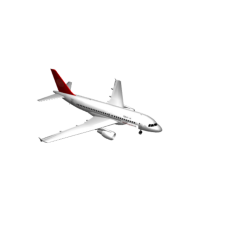

In [70]:
import matplotlib.pyplot as plt
import dataset

path = "dataset/test/test_data/873f4d2e92681d12709eb7790ef48e0c/models/model_normalized.obj"
mat = dataset.geometry.random_camera()
color = dataset.rendering.render(path, mat)
plt.figure()
plt.axis('off')
plt.imshow(color)
plt.show()

In [42]:
import glob
import os
import pickle

import numpy as np
import PIL.Image as Image
import tqdm.notebook as tqdm


In [44]:
def make_dir(dir_path):
    if not os.path.exists(dir_path):
        os.mkdir(dir_path)

def make_dataset(input_path, output_path, size=128, number_models=None, nb_samples_per_model=20):
    make_dir(output_path)
    objects_path = os.path.join(input_path, "*/models/*.obj")
    objects_path = glob.glob(objects_path)
    if number_models is not None:
        objects_path = objects_path[:number_models]
    for path in tqdm.tqdm(objects_path):
        name = path.split(os.path.sep)[-3]
        object_dir = os.path.join(output_path, name)
        make_dir(object_dir)
        for i in range(nb_samples_per_model):
            render_name = f"render_{str(i).zfill(5)}"
            mat_name = f"mat_{str(i).zfill(5)}"
            image_path = os.path.join(object_dir, render_name + ".png") 
            mat_path = os.path.join(object_dir, render_name + ".pkl") 
            mat = dataset.geometry.random_camera()
            color = dataset.rendering.render(path, mat)
            im = Image.fromarray(color)
            im.save(image_path)
            with open(mat_path, 'wb') as handle:
                pickle.dump(mat, handle, protocol=pickle.HIGHEST_PROTOCOL)
            
planes_input = objects_path = "/Data/leo/download/ShapeNetCore.v2/02691156/"
planes_output = "data/planes"
make_dataset(planes_input, planes_output, number_models=10)

GLError: GLError(
	err = 1282,
	description = b'invalid operation',
	baseOperation = glBindVertexArray,
	cArguments = (14,)
)

In [11]:
import os
os.environ["PYOPENGL_PLATFORM"] = "egl"
import numpy as np
import trimesh
import pyrender

In [47]:
fuze_trimesh = trimesh.load(path)
print(type(fuze_trimesh))

<class 'trimesh.scene.scene.Scene'>


In [69]:
tm = fuze_trimesh.geometry["None_n1PIc6arCzUP"]
pyrender.Mesh.from_points(tm.vertices)

In [56]:
fuze_trimesh.geometry_identifiers

{'a1d0830f6482d3dae672222092cf7550': 'None_n1PIc6arCzUP',
 '5a49cc475690928f5796decb26b22abf': 'None_n1O9f1vNAqPn',
 '613680e3a024f84b4333b9b75c3da540': 'None_n1OcXmnQbLWP',
 'ce4886aa8ce39b130ef18bd9c028ea1a': 'None_n1MGAGNmTzTd',
 '508ee8283ac8612360ad66b578e69ab4': 'None_n1NooQAMsezn',
 'e1702747bb960df3147e4138e530936d': 'None_n1Pe7ohHo3pP',
 'e4583de9431edc9d430f2edc1cfd7c96': 'None_n1MwETSzmJTr',
 '6bb43a838c480f58a39f94e6afa0ee75': 'None_n1PnUiHBn7lP',
 '329989ae2d1479565966e84ac5118710': 'None_n1OQW9sEg7CP',
 'afd497e1c93fc5e6c22b040aab8cbfd5': 'None_oFN6z2QfeDTP',
 '0af51ebbfa7ebe84ecb7cc8a2c414ef6': 'None_oFMV5EeN7zrP',
 '70b5bce19de74497c5f180fef1147767': 'None_oFP46c5ajQP0',
 'b13befdec7618dcad4d48e1173f8b0c9': 'None_oFPoAR1glijC',
 '718ddbeb83619afe48bf3031f5211a10': 'None_oFOMercTK0Xs',
 '31a5669d020b34ccaead9eec22f4a1cf': 'None_oFNm0mw6ab7T',
 '555c79176e257ff0c884424a2c9a4db5': 'None_oFP8Mqv6kiba',
 'cf923a3a06a5394212cff9cf530d9460': 'None_oFPUsCsdoHsP',
 '7a05c1546853

In [72]:
fuze_trimesh.geometry["None_n1PnUiHBn7lP"].vertices

TrackedArray([[ 0.069056, -0.054835,  0.070285],
              [ 0.069056, -0.054835,  0.09062 ],
              [ 0.069056, -0.059051,  0.06945 ],
              ...,
              [ 0.086167, -0.054188,  0.082473],
              [ 0.086167, -0.048026,  0.080475],
              [ 0.086167, -0.063913,  0.082473]])

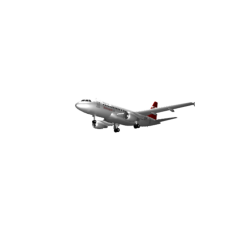

In [76]:
path = "dataset/test/test_data/873f4d2e92681d12709eb7790ef48e0c/models/model_normalized.obj"
mat = dataset.geometry.random_camera()
color = dataset.rendering.render(path, mat)
plt.figure()
plt.axis('off')
plt.imshow(color)
plt.show()

In [124]:
def mult_vec(mat, vec):
    v = np.ones((len(vec),4))
    v[:,:3] = vec
    return (v@mat)[:,:3]

pts = fuze_trimesh.geometry["None_n1PnUiHBn7lP"].vertices
pts = mult_vec(mat, pts)
colors = np.random.uniform(size=pts.shape)
m = pyrender.Mesh.from_points(pts, colors=colors)
scene = pyrender.Scene()
scene.add_node(pyrender.Node(mesh=m))
camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0)
s = np.sqrt(2)/2
mat_default = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,1],
    [0,0,0,1],
])
scene.add(camera, pose=mat_default)

light = pyrender.SpotLight(color=np.ones(3), intensity=4.0,
                           innerConeAngle=np.pi/16.0)
scene.add(light, pose=mat_default)
light = pyrender.SpotLight(color=np.ones(3), intensity=6.0,
                           innerConeAngle=0.2*np.pi)
light_pose = np.array([
    [0,1,0,0],
    [0,0,1,1],
    [1,0,0,0],
    [0,0,0,1]
], dtype=np.float32)
scene.add(light, pose=light_pose)
r = pyrender.OffscreenRenderer(512, 512)
color2, depth = r.render(scene)

In [122]:
def mult_vec(mat, vec):
    v = np.ones((len(vec),4))
    v[:,:3] = vec
    return (v@mat)[:,:3]

[ 0.069056 -0.054835  0.070285]
[ 0.00061852 -0.08058031 -0.07887979]


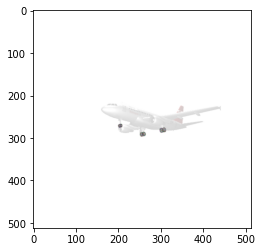

In [125]:
plt.imshow(color)
plt.imshow(color2, alpha=0.8)